# SC1015 PT3 Mini-Project

### Group E Members:
1. TENG FANRU - U2123741C
2. KU QIAN YU - U2120792H
3. JIN FUYI - U2120425D

## Import Essential Libraries

In [22]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## 1.1. Data Preparation
Dataset from Kaggle : Suicide Rates Overview 1985 to 2016  
Source: https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016

The dataset is in `master.csv`; hence we use the `read_csv` function from Pandas.
Immediately after importing, take a quick look at the data using the `head` function.

In [23]:
# Import the dataset -  Suicide Rates Overview 1985 to 2016
masterdata = pd.read_csv('master_2.csv')
masterdata.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,adminregion,incomeLevel
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2.156625e+09,796,Generation X,Europe & Central Asia (excluding high income),Upper middle income
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2.156625e+09,796,Silent,Europe & Central Asia (excluding high income),Upper middle income
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2.156625e+09,796,Generation X,Europe & Central Asia (excluding high income),Upper middle income
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2.156625e+09,796,G.I. Generation,Europe & Central Asia (excluding high income),Upper middle income
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2.156625e+09,796,Boomers,Europe & Central Asia (excluding high income),Upper middle income


In [24]:
# Get the data types and data dimensions:
print("Data type : ", type(masterdata))
print(masterdata.dtypes)
print("Data dims : ", masterdata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
gdp_for_year ($)      float64
gdp_per_capita ($)      int64
generation             object
adminregion            object
incomeLevel            object
dtype: object
Data dims :  (27820, 14)


## 1.2. Clean Data
### 1.2.1. Standardise the Variable Names

In [25]:
# Create a copy of the Dataset
masterdata_clean = masterdata.copy()

# Convert all Variable Names to UPPERCASE
masterdata_clean.columns = masterdata.columns.str.upper()

# Rename the Variables Names which have characters combined together
masterdata_clean.rename(columns = {'ADMINREGION': 'ADMIN REGION'}, inplace = True)
masterdata_clean.rename(columns = {'INCOMELEVEL': 'INCOME LEVEL'}, inplace = True)

# Remove all spaces from Variable Names
masterdata_clean.columns = masterdata_clean.columns.str.replace("-","_")
masterdata_clean.columns = masterdata_clean.columns.str.replace(" ","_")

# Print the Variable Information to check
masterdata_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   COUNTRY             27820 non-null  object 
 1   YEAR                27820 non-null  int64  
 2   SEX                 27820 non-null  object 
 3   AGE                 27820 non-null  object 
 4   SUICIDES_NO         27820 non-null  int64  
 5   POPULATION          27820 non-null  int64  
 6   SUICIDES/100K_POP   27820 non-null  float64
 7   COUNTRY_YEAR        27820 non-null  object 
 8   HDI_FOR_YEAR        8364 non-null   float64
 9   GDP_FOR_YEAR_($)    27820 non-null  float64
 10  GDP_PER_CAPITA_($)  27820 non-null  int64  
 11  GENERATION          27820 non-null  object 
 12  ADMIN_REGION        11016 non-null  object 
 13  INCOME_LEVEL        25912 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 3.0+ MB


### 1.2.2. Remove outliers
Remove outliers for `SUICIDES_NO`, `POPULATION`, `HDI_FOR_YEAR`, `GDP_FOR_YEAR_($)`, `GDP_PER_CAPITA_($)`

In [5]:
# Extract the five variables for simplicity
CleanData = masterdata_clean[['SUICIDES_NO','POPULATION', 'HDI_FOR_YEAR', 'GDP_FOR_YEAR_($)', 'GDP_PER_CAPITA_($)']].copy()

SUICIDES_NO           3909
POPULATION            4180
HDI_FOR_YEAR            12
GDP_FOR_YEAR_($)      3586
GDP_PER_CAPITA_($)    1016
dtype: int64

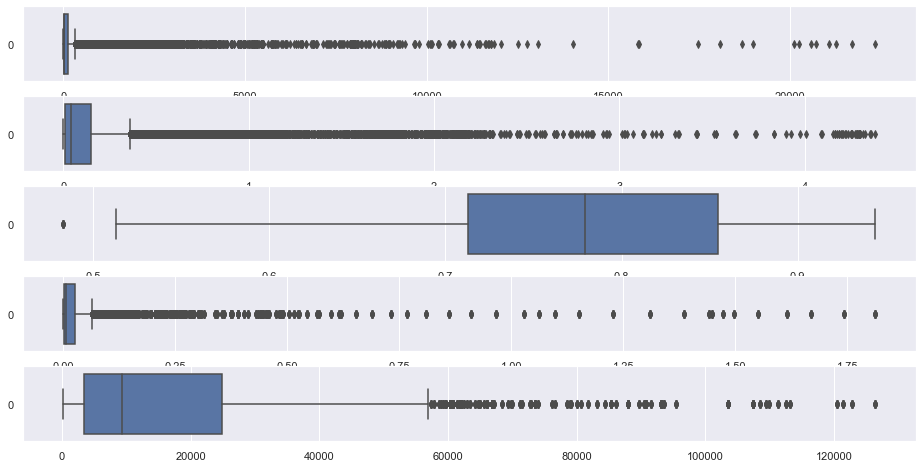

In [6]:
# Draw the boxplots
f, axes = plt.subplots(5, 1, figsize=(16, 8))

sb.boxplot(data = CleanData["SUICIDES_NO"], orient = "h", ax = axes[0])
sb.boxplot(data = CleanData["POPULATION"], orient = "h", ax = axes[1])
sb.boxplot(data = CleanData["HDI_FOR_YEAR"], orient = "h", ax = axes[2])
sb.boxplot(data = CleanData["GDP_FOR_YEAR_($)"], orient = "h", ax = axes[3])
sb.boxplot(data = CleanData["GDP_PER_CAPITA_($)"], orient = "h", ax = axes[4])

# Calculate the quartiles
Q1 = CleanData.quantile(0.25)
Q3 = CleanData.quantile(0.75)

# Rule to identify outliers
rule = ((CleanData < (Q1 - 1.5 * (Q3 - Q1))) | (CleanData > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

In [7]:
# Calculate the quartiles
Q1 = CleanData.quantile(0.25)
Q3 = CleanData.quantile(0.75)

# Rule to identify outliers
rule = ((CleanData < (Q1 - 1.5 * (Q3 - Q1))) | (CleanData > (Q3 + 1.5 * (Q3 - Q1))))

# Check the dataframe rule
rule

,SUICIDES_NO,POPULATION,HDI_FOR_YEAR,GDP_FOR_YEAR_($),GDP_PER_CAPITA_($)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
27815,False,True,False,False,False
27816,False,False,False,False,False
27817,False,False,False,False,False
27818,False,False,False,False,False


In [8]:
# Find the rows where ANY column is True
outliers = rule.any(axis = 1)   # axis 0 is row, 1 is column

# Check the outliers
outliers

0        False
1        False
2        False
3        False
4        False
         ...  
27815     True
27816    False
27817    False
27818    False
27819    False
Length: 27820, dtype: bool

In [9]:
# Total number of outliers for the two variables
outliers.value_counts()

False    20559
True      7261
dtype: int64

In [10]:
# Find the row indices correspond to outliers in the dataframe
outlierindices = outliers.index[outliers == True]
outlierindices

Int64Index([  589,   590,   601,   602,   613,   614,   625,   626,   637,
              638,
            ...
            27760, 27772, 27784, 27787, 27796, 27797, 27808, 27810, 27812,
            27815],
           dtype='int64', length=7261)

In [11]:
# Remove the outliers based on the row indices obtained above
CleanData.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
CleanData

,SUICIDES_NO,POPULATION,HDI_FOR_YEAR,GDP_FOR_YEAR_($),GDP_PER_CAPITA_($)
0,21,312900,NaN,2.156625e+09,796
1,16,308000,NaN,2.156625e+09,796
2,14,289700,NaN,2.156625e+09,796
3,1,21800,NaN,2.156625e+09,796
4,9,274300,NaN,2.156625e+09,796
...,...,...,...,...,...
27814,162,2735238,0.675,6.306708e+10,2309
27816,9,348465,0.675,6.306708e+10,2309
27817,60,2762158,0.675,6.306708e+10,2309
27818,44,2631600,0.675,6.306708e+10,2309


### Now we get a cleaned data!

## 2.1. Exploratory Data Analysis / Visualization

### 2.1.1. Numeric Variables Analysis
Extract the required numeric variables from the dataset, as mentioned in the problem

`POPULATION`, `HDI_FOR_YEAR`, `GDP_FOR_YEAR_($)`, `GDP_PER_CAPITA_($)`

In [12]:
masterdata_num = pd.DataFrame(CleanData[['POPULATION', 'HDI_FOR_YEAR', 'GDP_FOR_YEAR_($)', 'GDP_PER_CAPITA_($)']])
masterdata_num.head()

,POPULATION,HDI_FOR_YEAR,GDP_FOR_YEAR_($),GDP_PER_CAPITA_($)
0,312900,NaN,2.156625e+09,796
1,308000,NaN,2.156625e+09,796
2,289700,NaN,2.156625e+09,796
3,21800,NaN,2.156625e+09,796
4,274300,NaN,2.156625e+09,796


In [13]:
masterdata_num.describe()

,POPULATION,HDI_FOR_YEAR,GDP_FOR_YEAR_($),GDP_PER_CAPITA_($)
count,2.055900e+04,5956.000000,2.055900e+04,20559.000000
mean,4.894526e+05,0.758519,7.557308e+10,12939.629749
std,6.525486e+05,0.085374,1.174196e+11,13322.840224
min,2.780000e+02,0.513000,4.691962e+07,251.000000
25%,5.153000e+04,0.699000,4.689833e+09,3079.500000
50%,2.804390e+05,0.766000,2.165000e+10,7523.000000
75%,6.127340e+05,0.824000,9.583393e+10,19012.000000
max,3.568800e+06,0.917000,6.331940e+11,56833.000000


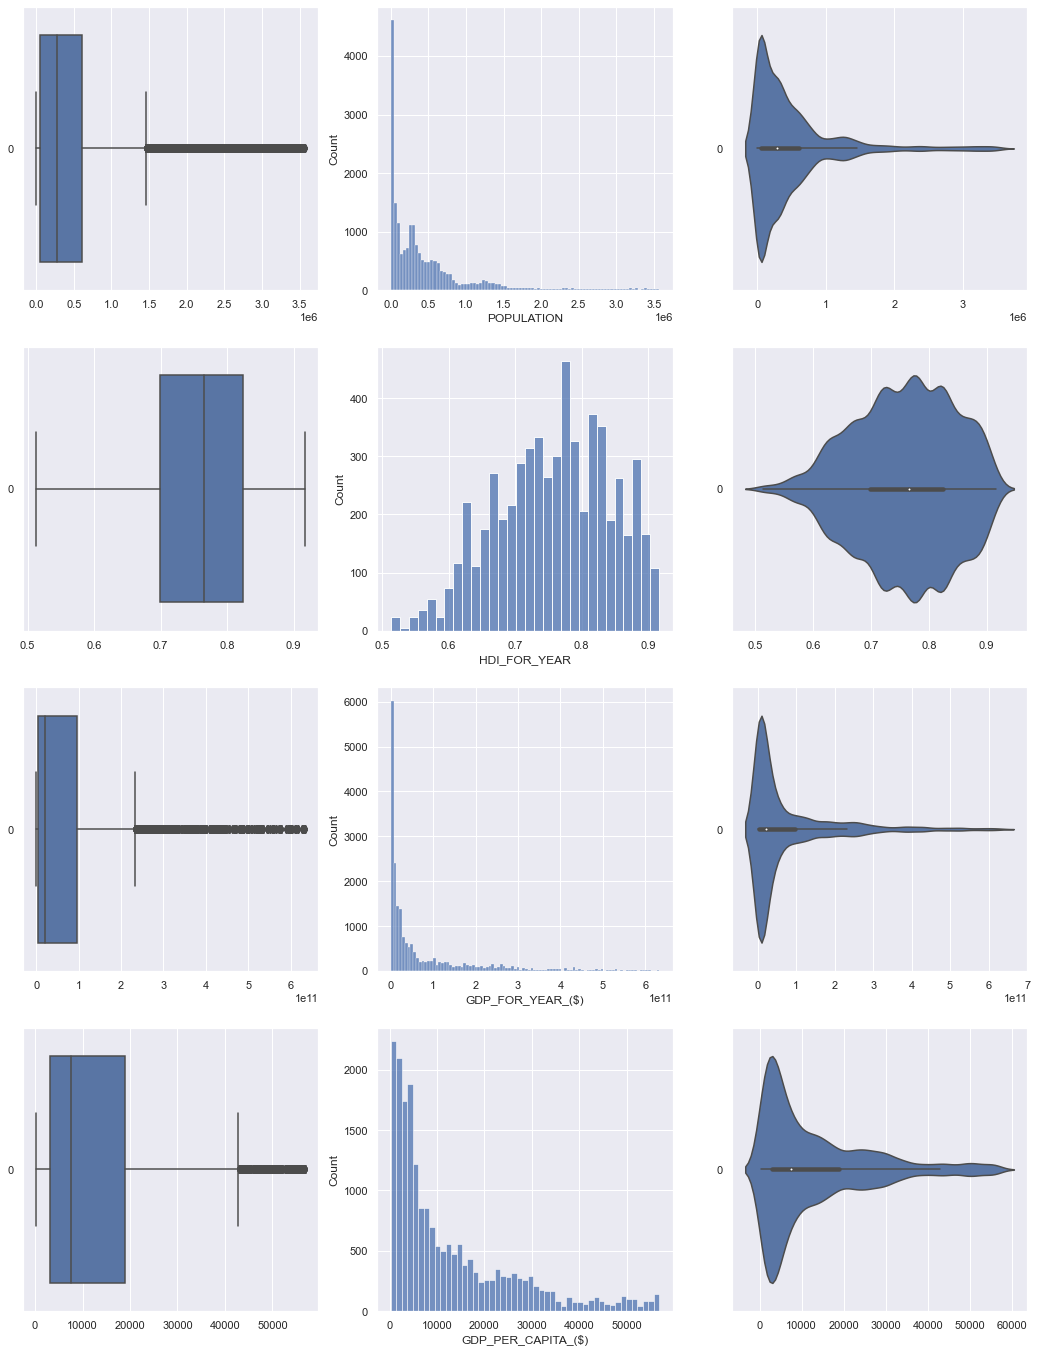

In [14]:
# Draw the distributions of all variables
f, axes = plt.subplots(4, 3, figsize=(18, 24))

count = 0
for var in masterdata_num:
    sb.boxplot(data = masterdata_num[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = masterdata_num[var], ax = axes[count,1])
    sb.violinplot(data = masterdata_num[var], orient = "h", ax = axes[count,2])
    count += 1

### Check the Relationships between them and SUICIDES_NO
Add SUICIDES_NO to the dataframe to check all Correlations and bi-variate Jointplots

Check the relationships between `POPULATION`, `HDI_FOR_YEAR`, `GDP_FOR_YEAR_($)`, `GDP_PER_CAPITA_($)`
and `SUICIDES_NO`

                    POPULATION  HDI_FOR_YEAR  GDP_FOR_YEAR_($)  \
POPULATION            1.000000     -0.032855          0.467206   
HDI_FOR_YEAR         -0.032855      1.000000          0.513303   
GDP_FOR_YEAR_($)      0.467206      0.513303          1.000000   
GDP_PER_CAPITA_($)   -0.079983      0.790706          0.531805   
SUICIDES_NO           0.480324      0.122938          0.353843   

                    GDP_PER_CAPITA_($)  SUICIDES_NO  
POPULATION                   -0.079983     0.480324  
HDI_FOR_YEAR                  0.790706     0.122938  
GDP_FOR_YEAR_($)              0.531805     0.353843  
GDP_PER_CAPITA_($)            1.000000     0.053692  
SUICIDES_NO                   0.053692     1.000000  


<AxesSubplot:>

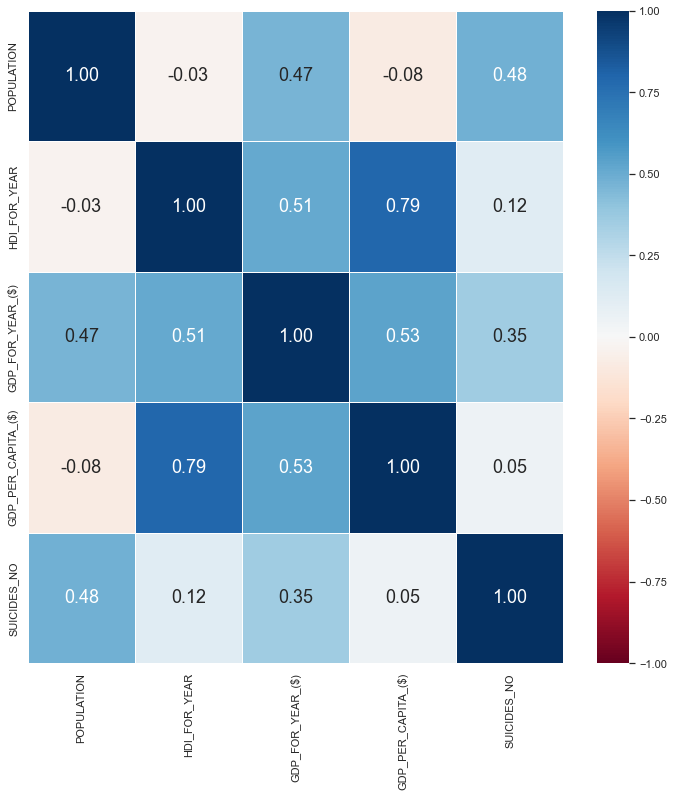

In [15]:
# Add SUICIDES_NO to the dataframe
masterdata_num = pd.concat([masterdata_num, CleanData["SUICIDES_NO"]], axis = 1).reindex(masterdata_num.index)

# Correlation Matrix
print(masterdata_num.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(masterdata_num.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

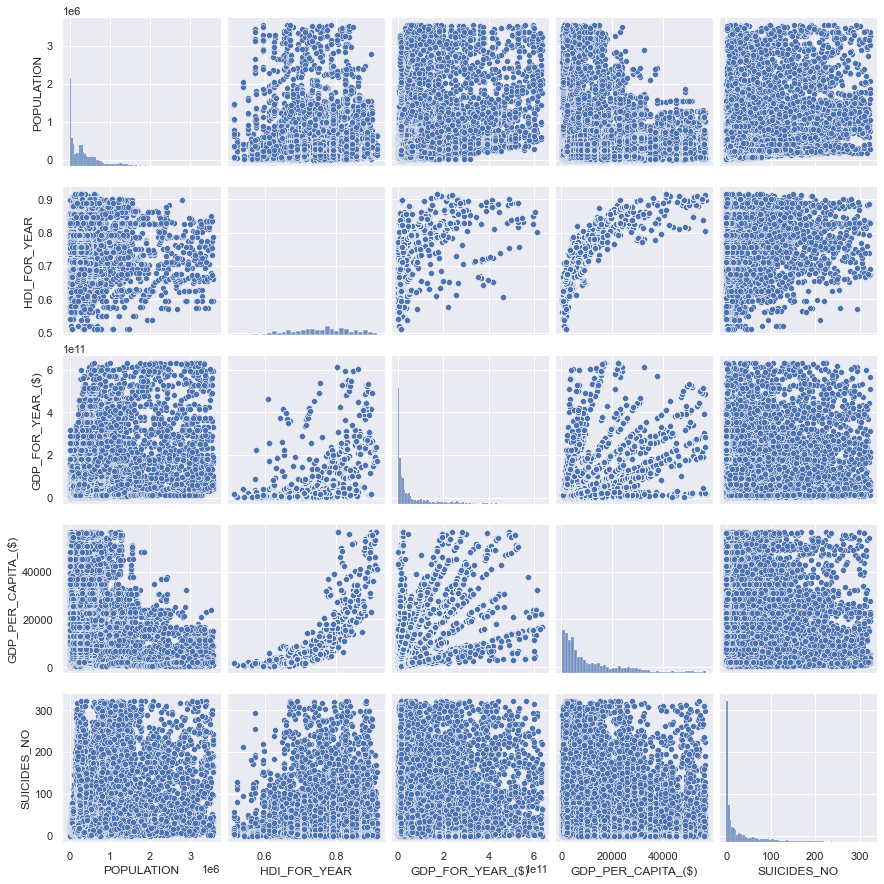

In [16]:
# Draw pairs of variables against one another
sb.pairplot(data = masterdata_num)

Observation: From the above plots,
> `POPULATION` : Possibly the most important variable : Highest Correlation, Strong Linearity

> `GDP_FOR_YEAR_($)` : important variable : Moderate Correlation, Moderate Linearity

> `HDI_FOR_YEAR` and `GDP_PER_CAPITA_($)`: Doesn't seem important as variables : Low Correlation, Weak Linear Relation

Hence, we would pick `POPULATION` and `GDP_FOR_YEAR_($)` as the top two predictors.

### 2.1.2. Analyze Categorical Data

Extract the required categorical variables from the dataset, as mentioned in the problem

`SEX`, `AGE`, `ADMIN_REGION`, `INCOME_LEVEL`

In [17]:
masterdata_cat = pd.DataFrame(masterdata_clean[['SEX', 'AGE', 'ADMIN_REGION', 'INCOME_LEVEL']])
masterdata_cat.head()

,SEX,AGE,ADMIN_REGION,INCOME_LEVEL
0,male,15-24 years,Europe & Central Asia (excluding high income),Upper middle income
1,male,35-54 years,Europe & Central Asia (excluding high income),Upper middle income
2,female,15-24 years,Europe & Central Asia (excluding high income),Upper middle income
3,male,75+ years,Europe & Central Asia (excluding high income),Upper middle income
4,male,25-34 years,Europe & Central Asia (excluding high income),Upper middle income


In [18]:
#Fix the data types of the extracted variables to convert them to categorical.
masterdata_cat = masterdata_cat.astype('category')

In [19]:
masterdata_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   SEX           27820 non-null  category
 1   AGE           27820 non-null  category
 2   ADMIN_REGION  11016 non-null  category
 3   INCOME_LEVEL  25912 non-null  category
dtypes: category(4)
memory usage: 109.5 KB


In [20]:
masterdata_cat.describe()

,SEX,AGE,ADMIN_REGION,INCOME_LEVEL
count,27820,27820,11016,25912
unique,2,6,5,3
top,female,15-24 years,Latin America & Caribbean (excluding high income),High income
freq,13910,4642,5350,14896


Observation:
- AGE has the highest number of levels as a categorical variable, total 6
- AGE: `15-24 years` is the highest, total 4642

### Check the Relationships between them and SUICIDES_NO

Check the relationships between `SEX`, `AGE`, `ADMIN_REGION`, `INCOME_LEVEL`
and `SUICIDES_NO`

In [21]:
# Add SUICIDES_NO to the dataframe
masterdata_cat = pd.concat([masterdata_cat, CleanData["SUICIDES_NO"]], axis = 1).reindex(masterdata_cat.index)
masterdata_cat.head()

,SEX,AGE,ADMIN_REGION,INCOME_LEVEL,SUICIDES_NO
0,male,15-24 years,Europe & Central Asia (excluding high income),Upper middle income,21.0
1,male,35-54 years,Europe & Central Asia (excluding high income),Upper middle income,16.0
2,female,15-24 years,Europe & Central Asia (excluding high income),Upper middle income,14.0
3,male,75+ years,Europe & Central Asia (excluding high income),Upper middle income,1.0
4,male,25-34 years,Europe & Central Asia (excluding high income),Upper middle income,9.0


Group SUICIDES_NO by the categorical variables to find the medians for each boxplot above and sort accordingly

<AxesSubplot:xlabel='SEX', ylabel='SUICIDES_NO'>

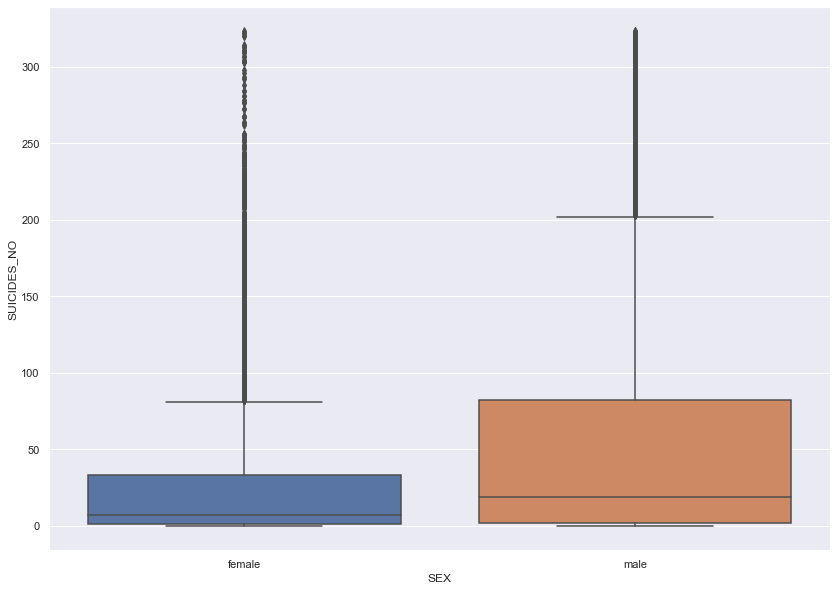

In [22]:
# Check the distribution of `SUICIDES_NO` across different `SEX`.
f = plt.figure(figsize=(14, 10))
sb.boxplot(x = 'SEX', y = 'SUICIDES_NO', data = masterdata_cat, 
           order = masterdata_cat.groupby('SEX')['SUICIDES_NO'].median().sort_values().index)

<AxesSubplot:xlabel='AGE', ylabel='SUICIDES_NO'>

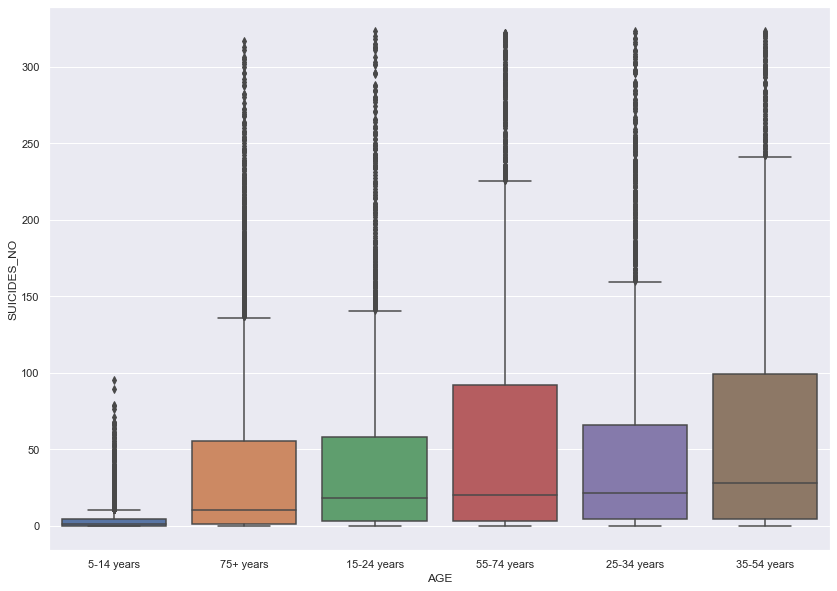

In [23]:
# Check the distribution of `SUICIDES_NO` across different `AGE`.
f = plt.figure(figsize=(14, 10))
sb.boxplot(x = 'AGE', y = 'SUICIDES_NO', data = masterdata_cat, 
           order = masterdata_cat.groupby('AGE')['SUICIDES_NO'].median().sort_values().index)

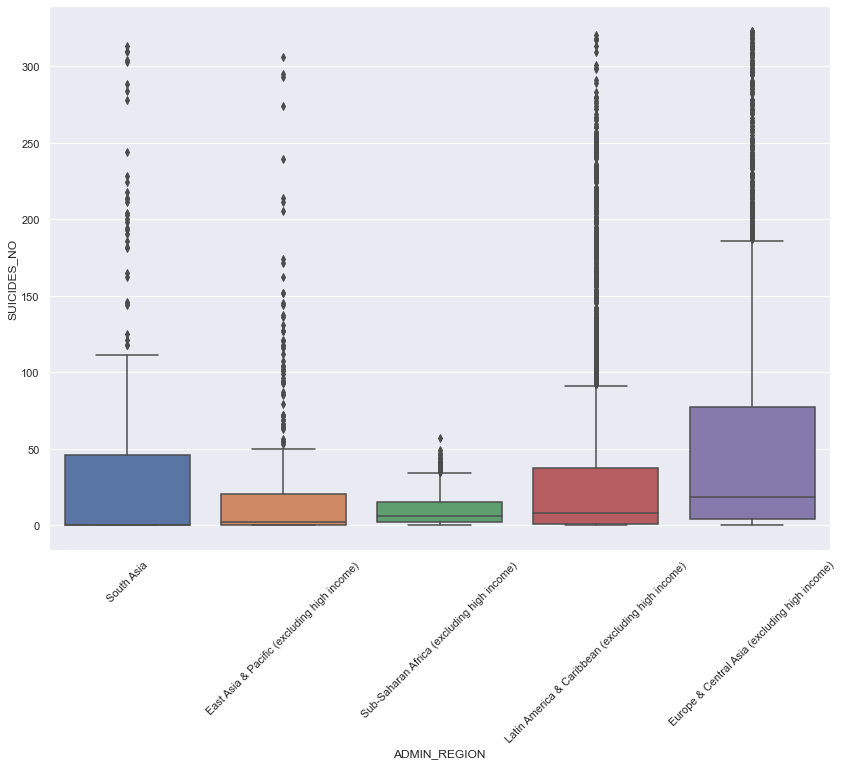

In [24]:
# Check the distribution of `SUICIDES_NO` across different `ADMIN_REGION`.
f = plt.figure(figsize=(14, 10))
sb.boxplot(x = 'ADMIN_REGION', y = 'SUICIDES_NO', data = masterdata_cat, 
           order = masterdata_cat.groupby('ADMIN_REGION')['SUICIDES_NO'].median().sort_values().index)
plt.xticks(rotation=45);

<AxesSubplot:xlabel='INCOME_LEVEL', ylabel='SUICIDES_NO'>

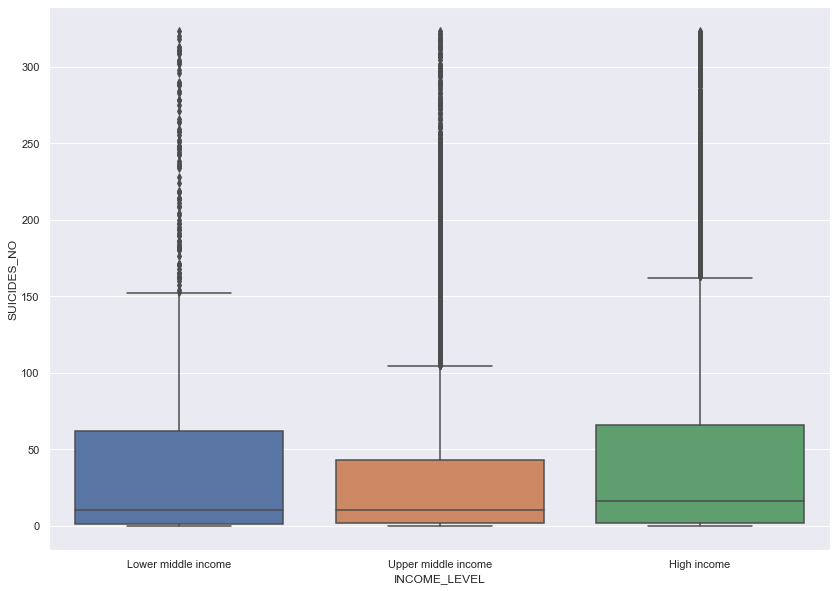

In [25]:
# Check the distribution of `SUICIDES_NO` across different `INCOME_LEVEL`.
f = plt.figure(figsize=(14, 10))
sb.boxplot(x = 'INCOME_LEVEL', y = 'SUICIDES_NO', data = masterdata_cat, 
           order = masterdata_cat.groupby('INCOME_LEVEL')['SUICIDES_NO'].median().sort_values().index)

Observation: From the above plots,
> `ADMIN_REGION`: Most important variable: Highest variation in `SUICIDES_NO` boxplots across the categorical levels
        
> `SEX` and `AGE`: Moderately important variables: Medium variation in `SUICIDES_NO` boxplots across the categorical levels
        
> `INCOME_LEVEL`: Doesn't seem important as variable : Not much variation in `SUICIDES_NO` boxplots across the categorical levels

Hence, we would pick `ADMIN_REGION` and `AGE` as the top two predictors, while `SEX` may be considered a third option.

#### Find the Top 10 countries with highest no. of suicide

[Text(0.5, 1.0, 'Top 10 Countries with higher suicide number')]

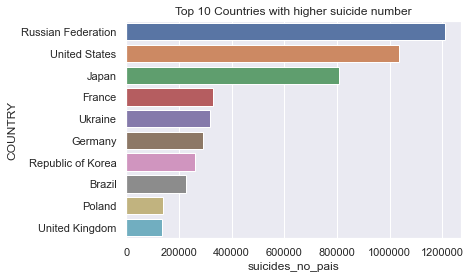

In [41]:
suicides_no_pais = []
for c in masterdata_clean['COUNTRY'].unique():
    suicides_no_pais.append(sum(masterdata_clean[masterdata_clean['COUNTRY'] == c]['SUICIDES_NO']))
    
n_suicides_pais = pd.DataFrame(suicides_no_pais, columns=['suicides_no_pais'])
n_suicides_pais['COUNTRY'] = masterdata_clean['COUNTRY'].unique()

quant = 10
top_paises = n_suicides_pais.sort_values('suicides_no_pais', ascending=False)['COUNTRY'][:quant]
top_suicides = n_suicides_pais.sort_values('suicides_no_pais', ascending=False)['suicides_no_pais'][:quant]
f, ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
sb.barplot(x = top_suicides, y = top_paises,data=masterdata_clean, ax=ax).set(title='Top 10 Countries with higher suicide number')

## 3.1. Machine Learning

### 3.1.1 Linear Regression
Predicating `SUICIDES_NO` using `POUPULATION` and `GDP_FOR_YEAR_($)`

### Linear Regression on SUICIDES_NO vs POPULATION and  GDP_FOR_YEAR_($)(CleanData - without outliers)

In [37]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(CleanData['SUICIDES_NO'])
X = pd.DataFrame(CleanData[['POPULATION','GDP_FOR_YEAR_($)']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

Train Set : (16447, 2) (16447, 1)
Test Set  : (4112, 2) (4112, 1)


LinearRegression()

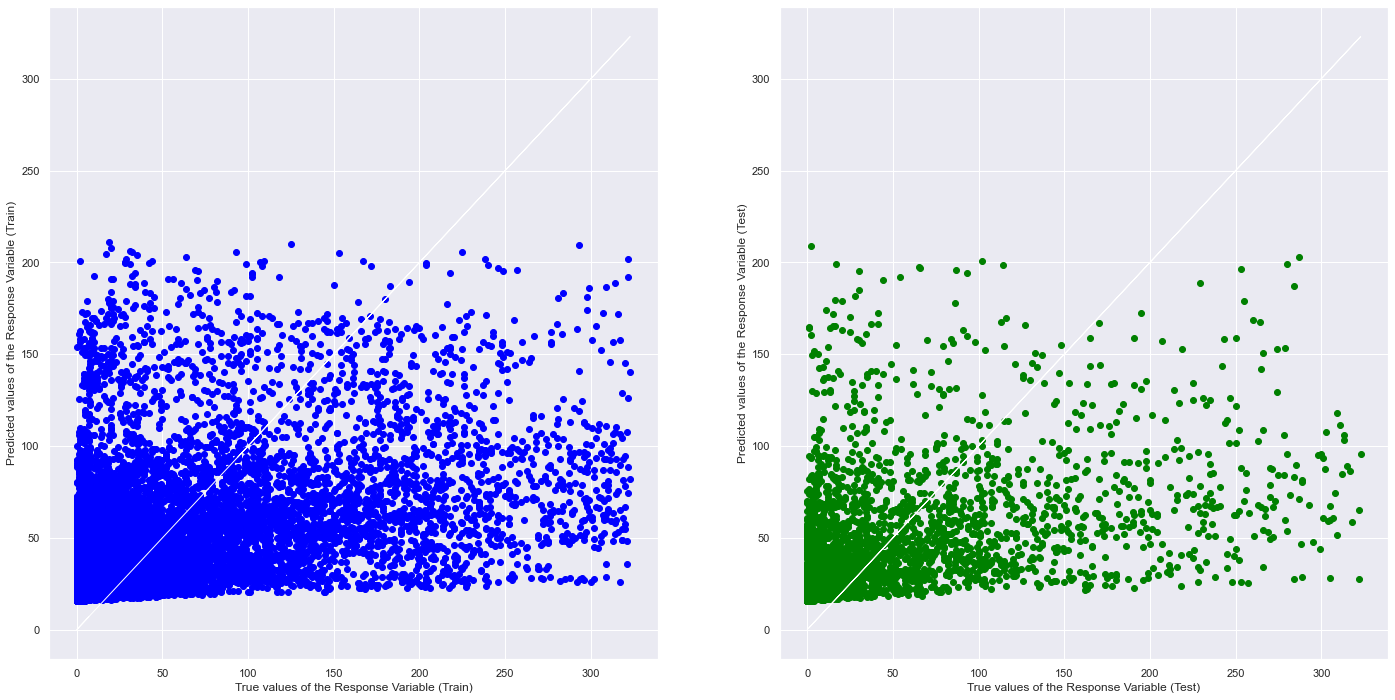

Explained Variance (R^2) on Train Set 	: 0.25621397391421996
Mean Squared Error (MSE) on Train Set 	: 3088.1846738417426
Mean Squared Error (MSE) on Test Set 	: 3056.9986445929353


In [38]:
# Predict SalePrice values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

### Linear Regression on SUICIDES_NO vs POPULATION and GDP_FOR_YEAR_($)  (masterdata_clean - with outliers)

In [39]:
# Extract Response and Predictors
y = pd.DataFrame(masterdata_clean['SUICIDES_NO'])
X = pd.DataFrame(masterdata_clean[['POPULATION','GDP_FOR_YEAR_($)']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

Train Set : (22256, 2) (22256, 1)
Test Set  : (5564, 2) (5564, 1)


LinearRegression()

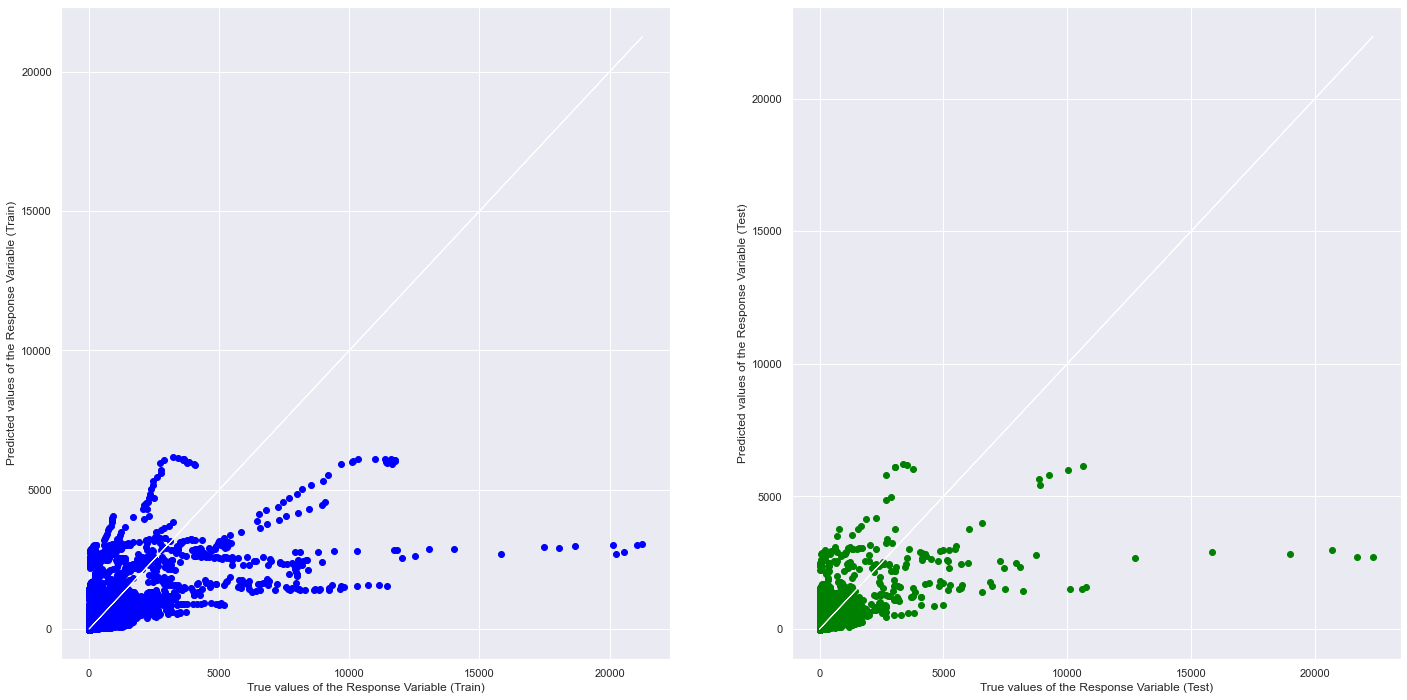

Explained Variance (R^2) on Train Set 	: 0.3911843426403723
Mean Squared Error (MSE) on Train Set 	: 475019.940613561
Mean Squared Error (MSE) on Test Set 	: 623633.0285384404


In [40]:
# Predict SUICIDES_NO values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

**Observation:** From the above plots, it seems that MSE improved a lot for the cleaned (outlier removed) data, but the R^2 has not changed a lot.

This means we are reducing both MSE and VAR($y$) in the dataset (and consequently in the train set) as we remove the outliers. So, MSE improves a lot, but R^2 remains similar. This is actually an improvement, as our final prediction accuracy and confidence intervals depend on the MSE of our model on test set.

## 4.1. Classification tree

In [28]:
#Find the median of suicide no.
median_suicide = masterdata_clean["SUICIDES_NO"].mean()
median_suicide

242.57440690150972

In [29]:
# To add suicide_rate column for prediction ('High' and 'Low')
masterdata_clean['SUICIDE_RATE'] = np.where(masterdata_clean['SUICIDES_NO']>median_suicide, 'High', 'Low')
masterdata_clean

,COUNTRY,YEAR,SEX,AGE,SUICIDES_NO,POPULATION,SUICIDES/100K_POP,COUNTRY_YEAR,HDI_FOR_YEAR,GDP_FOR_YEAR_($),GDP_PER_CAPITA_($),GENERATION,ADMIN_REGION,INCOME_LEVEL,SUICIDE_RATE
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2.156625e+09,796,Generation X,Europe & Central Asia (excluding high income),Upper middle income,Low
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2.156625e+09,796,Silent,Europe & Central Asia (excluding high income),Upper middle income,Low
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2.156625e+09,796,Generation X,Europe & Central Asia (excluding high income),Upper middle income,Low
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2.156625e+09,796,G.I. Generation,Europe & Central Asia (excluding high income),Upper middle income,Low
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2.156625e+09,796,Boomers,Europe & Central Asia (excluding high income),Upper middle income,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,6.306708e+10,2309,Generation X,Europe & Central Asia (excluding high income),Lower middle income,Low
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,6.306708e+10,2309,Silent,Europe & Central Asia (excluding high income),Lower middle income,Low
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,6.306708e+10,2309,Generation Z,Europe & Central Asia (excluding high income),Lower middle income,Low
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,6.306708e+10,2309,Generation Z,Europe & Central Asia (excluding high income),Lower middle income,Low


In [27]:
#To drop the column
#masterdata_clean.drop('SUICIDE_RATE', axis=1, inplace=True)

In [30]:
#Change GDP to int64
masterdata_clean['GDP_FOR_YEAR_($)']=masterdata_clean['GDP_FOR_YEAR_($)'].astype(np.int64)

In [31]:
masterdata_clean.info() #gdp_for_year ($) - change to int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   COUNTRY             27820 non-null  object 
 1   YEAR                27820 non-null  int64  
 2   SEX                 27820 non-null  object 
 3   AGE                 27820 non-null  object 
 4   SUICIDES_NO         27820 non-null  int64  
 5   POPULATION          27820 non-null  int64  
 6   SUICIDES/100K_POP   27820 non-null  float64
 7   COUNTRY_YEAR        27820 non-null  object 
 8   HDI_FOR_YEAR        8364 non-null   float64
 9   GDP_FOR_YEAR_($)    27820 non-null  int64  
 10  GDP_PER_CAPITA_($)  27820 non-null  int64  
 11  GENERATION          27820 non-null  object 
 12  ADMIN_REGION        11016 non-null  object 
 13  INCOME_LEVEL        25912 non-null  object 
 14  SUICIDE_RATE        27820 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 3.2+

In [21]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
master_cat = masterdata_clean[['SEX','AGE','ADMIN_REGION']]
ohe.fit(master_cat)
master_cat_ohe = pd.DataFrame(ohe.transform(master_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(master_cat.columns))

# Check the encoded variables
master_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 14 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   SEX_female                                                      27820 non-null  float64
 1   SEX_male                                                        27820 non-null  float64
 2   AGE_15-24 years                                                 27820 non-null  float64
 3   AGE_25-34 years                                                 27820 non-null  float64
 4   AGE_35-54 years                                                 27820 non-null  float64
 5   AGE_5-14 years                                                  27820 non-null  float64
 6   AGE_55-74 years                                                 27820 non-null  float64
 7   AGE_75+ years                                    

In [32]:
# Combining Numeric features with the OHE Categorical features
masterdata_num = masterdata_clean[['GDP_FOR_YEAR_($)','POPULATION']]
masterdata_res = masterdata_clean['SUICIDE_RATE']
masterdata_ohe = pd.concat([masterdata_num, master_cat_ohe, masterdata_res], 
                           sort = False, axis = 1).reindex(index=masterdata_num.index)

# Check the final dataframe
masterdata_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 17 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   GDP_FOR_YEAR_($)                                                27820 non-null  int64  
 1   POPULATION                                                      27820 non-null  int64  
 2   SEX_female                                                      27820 non-null  float64
 3   SEX_male                                                        27820 non-null  float64
 4   AGE_15-24 years                                                 27820 non-null  float64
 5   AGE_25-34 years                                                 27820 non-null  float64
 6   AGE_35-54 years                                                 27820 non-null  float64
 7   AGE_5-14 years                                   

#### Create and Fit the Model 

After the encoding and upsampling is done, we can create and fit the DecisionTreeClassifier model on the dataset.

[Text(0.5, 0.875, 'POPULATION <= 1364718.0\ngini = 0.284\nsamples = 19474\nvalue = [3331, 16143]'),
 Text(0.25, 0.625, 'POPULATION <= 697497.0\ngini = 0.075\nsamples = 14228\nvalue = [553, 13675]'),
 Text(0.125, 0.375, 'GDP_FOR_YEAR_($) <= 897846018048.0\ngini = 0.016\nsamples = 11978\nvalue = [99, 11879]'),
 Text(0.0625, 0.125, 'gini = 0.016\nsamples = 11965\nvalue = [94, 11871]'),
 Text(0.1875, 0.125, 'gini = 0.473\nsamples = 13\nvalue = [5, 8]'),
 Text(0.375, 0.375, 'SEX_female <= 0.5\ngini = 0.322\nsamples = 2250\nvalue = [454, 1796]'),
 Text(0.3125, 0.125, 'gini = 0.477\nsamples = 1114\nvalue = [437, 677]'),
 Text(0.4375, 0.125, 'gini = 0.029\nsamples = 1136\nvalue = [17, 1119]'),
 Text(0.75, 0.625, 'AGE_5-14 years <= 0.5\ngini = 0.498\nsamples = 5246\nvalue = [2778, 2468]'),
 Text(0.625, 0.375, 'SEX_male <= 0.5\ngini = 0.462\nsamples = 4331\nvalue = [2765, 1566]'),
 Text(0.5625, 0.125, 'gini = 0.485\nsamples = 2215\nvalue = [914, 1301]'),
 Text(0.6875, 0.125, 'gini = 0.219\nsampl

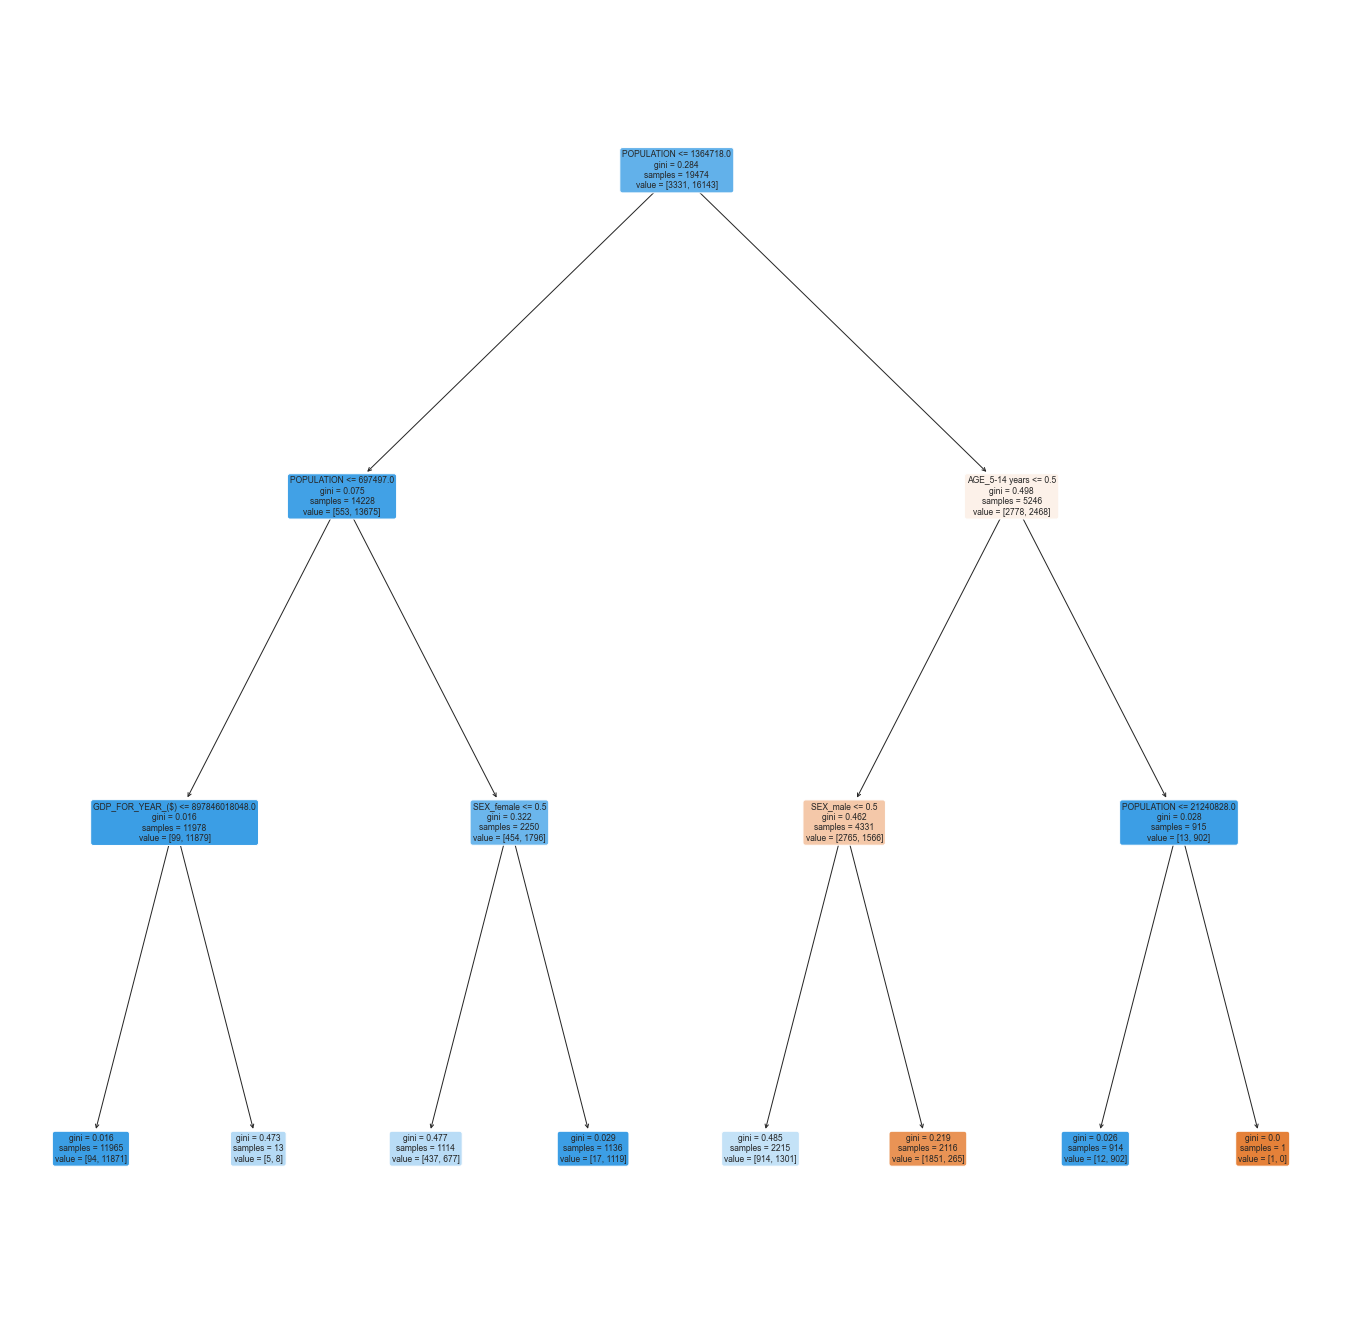

In [33]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
y = pd.DataFrame(masterdata_ohe['SUICIDE_RATE'])
X = pd.DataFrame(masterdata_ohe.drop('SUICIDE_RATE', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns)

#### Check the accuracy of the Model 

Train Data
Accuracy  :	 0.9104446954914245

TPR Train :	 0.9835842160688844
TNR Train :	 0.5559891924347042

FPR Train :	 0.4440108075652957
FNR Train :	 0.016415783931115653

Test Data
Accuracy  :	 0.9098969566259286

TPR Test :	 0.9832041343669251
TNR Test :	 0.5398550724637681

FPR Test :	 0.4601449275362319
FNR Test :	 0.016795865633074936


<AxesSubplot:>

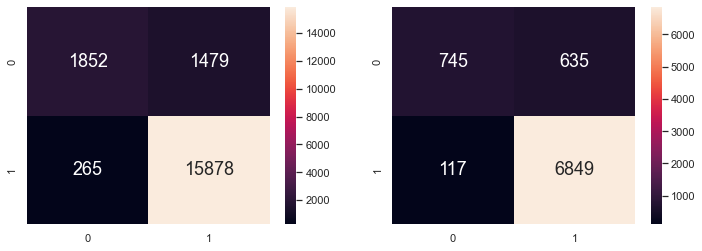

In [34]:
#Train Data
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
f,axes=plt.subplots(1,2,figsize=(12,4))
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax=axes[1])

#### Refine previous model by balancing the classes of the response SUICIDE_RATE in the training data

In [35]:
#Upsample Bad to match Good
from sklearn.utils import resample

suicideHigh = masterdata_ohe[masterdata_ohe.SUICIDE_RATE == 'High']
suicideLow = masterdata_ohe[masterdata_ohe.SUICIDE_RATE == 'Low']
 
# Upsample the Bad samples
suicideLow_up = resample(suicideLow, 
                        replace=True,                     # sample with replacement
                        n_samples=suicideHigh.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
master_ohe_up = pd.concat([suicideHigh, suicideLow_up])
 
# Check the ratio of the classes
master_ohe_up['SUICIDE_RATE'].value_counts()

High    4711
Low     4711
Name: SUICIDE_RATE, dtype: int64

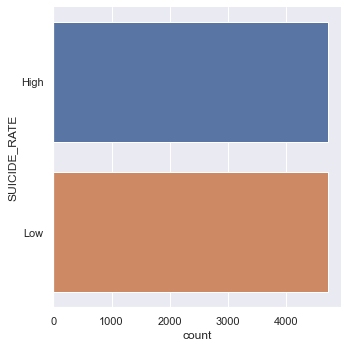

In [26]:
# Quick plot to check the balanced classes visually
sb.catplot(y = 'SUICIDE_RATE', data = master_ohe_up, kind = "count")

In [36]:
master_ohe_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9422 entries, 589 to 27675
Data columns (total 17 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   GDP_FOR_YEAR_($)                                                9422 non-null   int64  
 1   POPULATION                                                      9422 non-null   int64  
 2   SEX_female                                                      9422 non-null   float64
 3   SEX_male                                                        9422 non-null   float64
 4   AGE_15-24 years                                                 9422 non-null   float64
 5   AGE_25-34 years                                                 9422 non-null   float64
 6   AGE_35-54 years                                                 9422 non-null   float64
 7   AGE_5-14 years                                  

#### Create and Fit the Model

[Text(0.5446428571428571, 0.9, 'POPULATION <= 712086.0\ngini = 0.5\nsamples = 6595\nvalue = [3275, 3320]\nclass = High'),
 Text(0.2857142857142857, 0.7, 'POPULATION <= 660955.0\ngini = 0.082\nsamples = 2560\nvalue = [110, 2450]\nclass = High'),
 Text(0.14285714285714285, 0.5, 'GDP_FOR_YEAR_($) <= 737032011776.0\ngini = 0.061\nsamples = 2475\nvalue = [78, 2397]\nclass = High'),
 Text(0.07142857142857142, 0.3, 'SEX_male <= 0.5\ngini = 0.057\nsamples = 2467\nvalue = [73, 2394]\nclass = High'),
 Text(0.03571428571428571, 0.1, 'gini = 0.0\nsamples = 1182\nvalue = [0, 1182]\nclass = High'),
 Text(0.10714285714285714, 0.1, 'gini = 0.107\nsamples = 1285\nvalue = [73, 1212]\nclass = High'),
 Text(0.21428571428571427, 0.3, 'GDP_FOR_YEAR_($) <= 1258480009216.0\ngini = 0.469\nsamples = 8\nvalue = [5, 3]\nclass = Low'),
 Text(0.17857142857142858, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Low'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = High'),
 Text(0.428571428

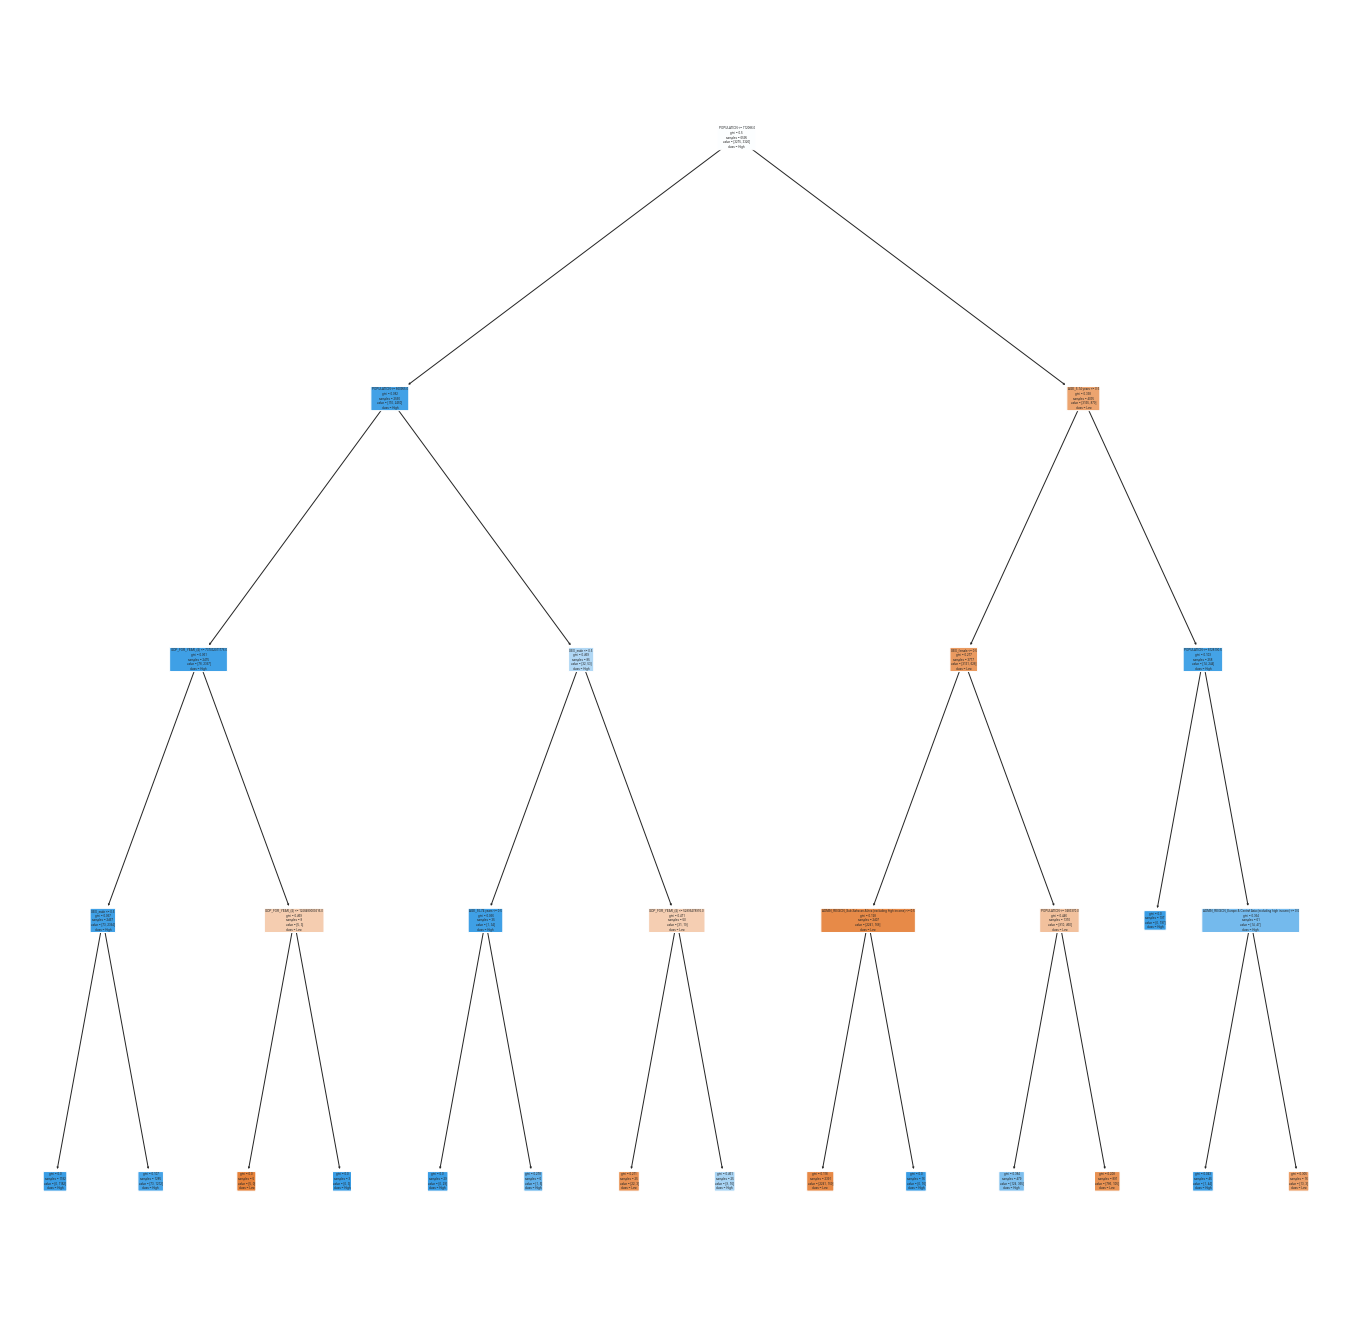

In [37]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
y = pd.DataFrame(master_ohe_up['SUICIDE_RATE'])
X = pd.DataFrame(master_ohe_up.drop('SUICIDE_RATE', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Low","High"])

#### Check the accuracy of the Model 

Train Data
Accuracy  :	 0.9288855193328279

TPR Train :	 0.9213855421686747
TNR Train :	 0.9364885496183206

FPR Train :	 0.0635114503816794
FNR Train :	 0.0786144578313253

Test Data
Accuracy  :	 0.9235939158118146

TPR Test :	 0.910136592379583
TNR Test :	 0.9366295264623955

FPR Test :	 0.06337047353760446
FNR Test :	 0.08986340762041696


<AxesSubplot:>

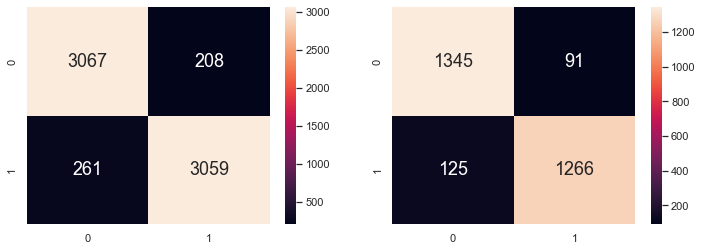

In [38]:
#Train Data
#Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))


# Plot the two-way Confusion Matrix
f,axes=plt.subplots(1,2,figsize=(12,4))
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax=axes[1])

### Random Forest 

It uses an ensemble of trees for better classification.

In [39]:
# Extract Response and Predictors
y = pd.DataFrame(master_ohe_up['SUICIDE_RATE'])
X = pd.DataFrame(master_ohe_up.drop('SUICIDE_RATE', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [40]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.SUICIDE_RATE.ravel())

RandomForestClassifier(max_depth=4)

Train Data
Accuracy  :	 0.9232752084912813

TPR Train :	 0.8926296633303002
TNR Train :	 0.9539114614918133

FPR Train :	 0.04608853850818678
FNR Train :	 0.10737033666969972

Test Data
Accuracy  :	 0.9172267421294659

TPR Test :	 0.8910891089108911
TNR Test :	 0.943382873319179

FPR Test :	 0.056617126680820945
FNR Test :	 0.10891089108910891


<AxesSubplot:>

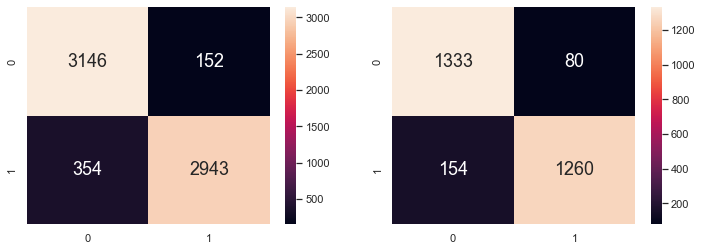

In [41]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()
# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
f,axes=plt.subplots(1,2,figsize=(12,4))
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax=axes[1])

The accuracy still not looks well with model Random Forest.

### GridSearchCV 

In [42]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Extract Response and Predictors
y = pd.DataFrame(master_ohe_up['SUICIDE_RATE'])
X = pd.DataFrame(master_ohe_up.drop('SUICIDE_RATE', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [43]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(9,14),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.SUICIDE_RATE.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 9, 10, 11, 12, 13])},
             scoring='accuracy')

In [44]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=10, n_estimators=13)
0.9551175132676271


In [45]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(master_ohe_up['SUICIDE_RATE'])
X = pd.DataFrame(master_ohe_up.drop('SUICIDE_RATE', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 400,   # found using GridSearchCV
                                 max_depth = 10)       # found using GridSearchCV

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.SUICIDE_RATE.ravel())

RandomForestClassifier(max_depth=10, n_estimators=400)

Train Data
Accuracy  :	 0.9696739954510993

TPR Train :	 0.9565349544072949
TNR Train :	 0.9827534039334342

FPR Train :	 0.017246596066565808
FNR Train :	 0.04346504559270517

Test Data
Accuracy  :	 0.9600282985496993

TPR Test :	 0.9479239971850809
TNR Test :	 0.9722617354196301

FPR Test :	 0.027738264580369845
FNR Test :	 0.05207600281491907


<AxesSubplot:>

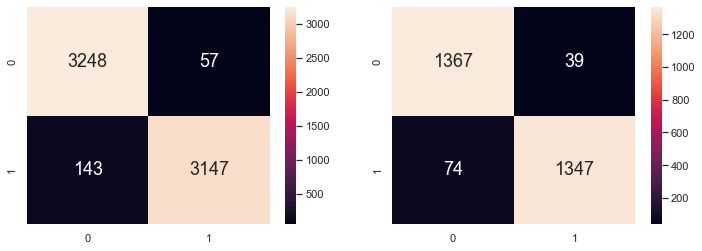

In [46]:
#Train Set
#Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()
# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
f,axes=plt.subplots(1,2,figsize=(12,4))
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax=axes[1])

Grid Search Model has the highest accuracy which is 0.96 among three model